In [1]:
from __future__ import annotations

# logger.addHandler(logging.FileHandler(r"C:\Users\dupontma2\Downloads\log.txt"))
from pathlib import Path

import matplotlib.pyplot as plt
from pandas.tseries import frequencies

from post_processing.dataclass.data_aplose import DataAplose
from post_processing.dataclass.detection_filter import DetectionFilter
from post_processing.dataclass.recording_period import RecordingPeriod

### Load data

In [2]:
yaml_file = Path(r"resource\OHASISBIO_yaml.yml")
data_list = DataAplose.from_yaml(file=yaml_file)
config_list = DetectionFilter.from_yaml(file=yaml_file)

for data in data_list:
    data.lat = -49
    data.lon = 70

### Overview

	2025-09-02 10:17:21,820
- Overview of the detections -
                                     lleboul
annotation                                 
Antarctic blue whale chorus             778
Antarctic blue whale song                69
Fin whale 20 Hz                          21
Fin whale 40 Hz                          13
Fin whale chorus                        556
LF 8 sec pulse                            2
Madagascan pygmy blue whale chorus      250
Madagascan pygmy blue whale song         24



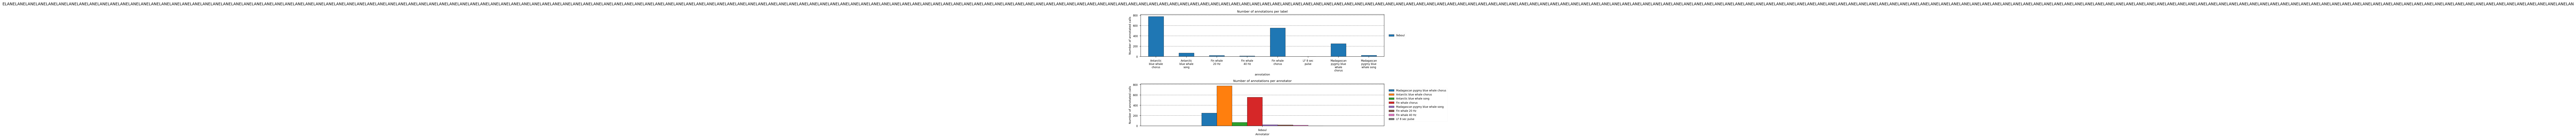

	2025-09-02 10:17:22,915
- Overview of the detections -
                                     lleboul
annotation                                 
Airgun                                  132
Antarctic blue whale chorus             427
Antarctic blue whale song               358
Australian pygmy blue whale chorus      203
Australian pygmy blue whale song         95
Fin whale 20 Hz                         279
Fin whale 40 Hz                          29
Fin whale chorus                        487
LF 8 sec pulse                           12
Madagascan pygmy blue whale chorus      194
Madagascan pygmy blue whale song         16
Minke whale                              38
Sri Lanka pygmy blue whale song          22



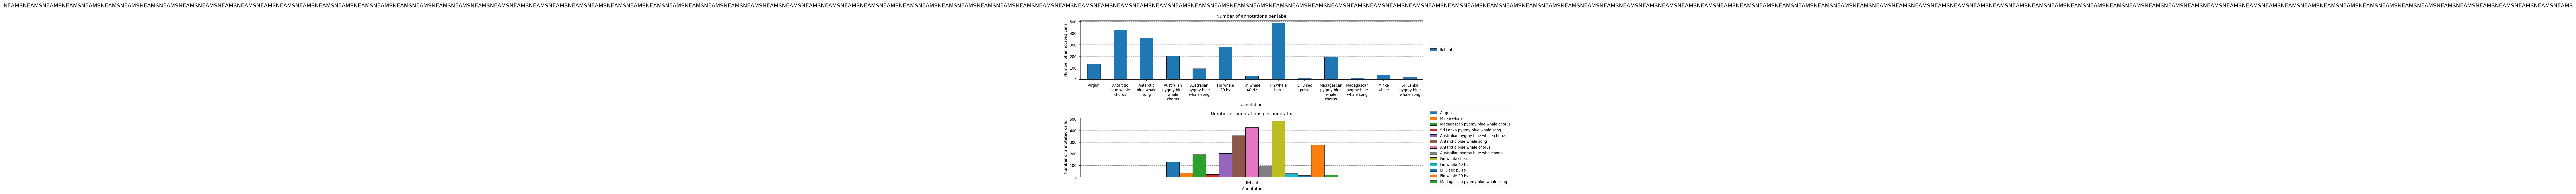

	2025-09-02 10:17:23,992
- Overview of the detections -
                                     lleboul
annotation                                 
Airgun                                  113
Antarctic blue whale chorus             610
Antarctic blue whale song               150
Australian pygmy blue whale chorus       92
Fin whale 20 Hz                         216
Fin whale 40 Hz                          17
Fin whale chorus                        528
Madagascan pygmy blue whale chorus      439
Madagascan pygmy blue whale song         67
Minke whale                              14



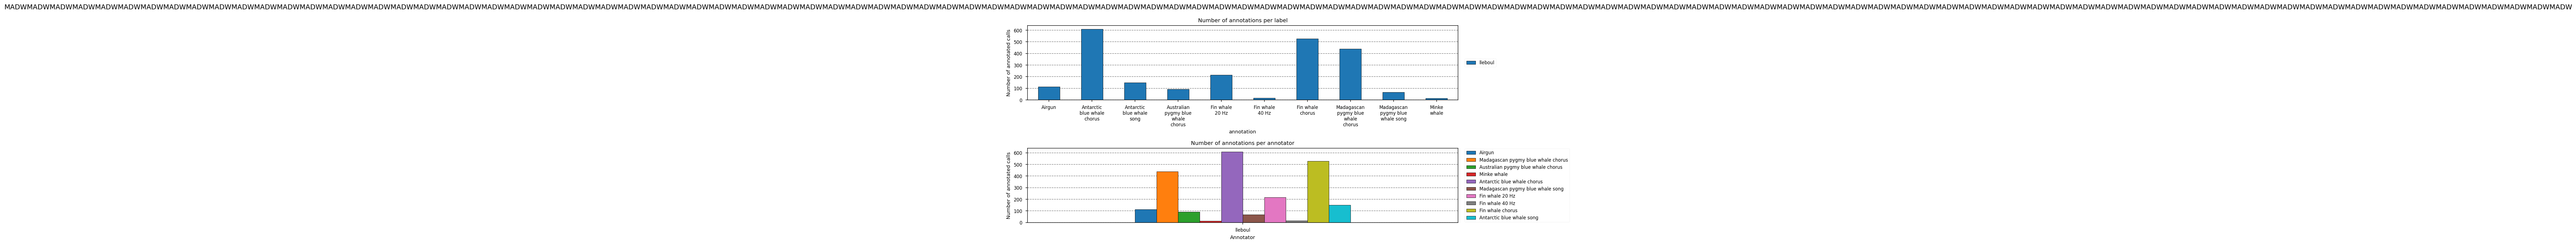

In [3]:
for data in data_list:
    data.overview()
    plt.tight_layout()
    plt.show()

### Single barplot

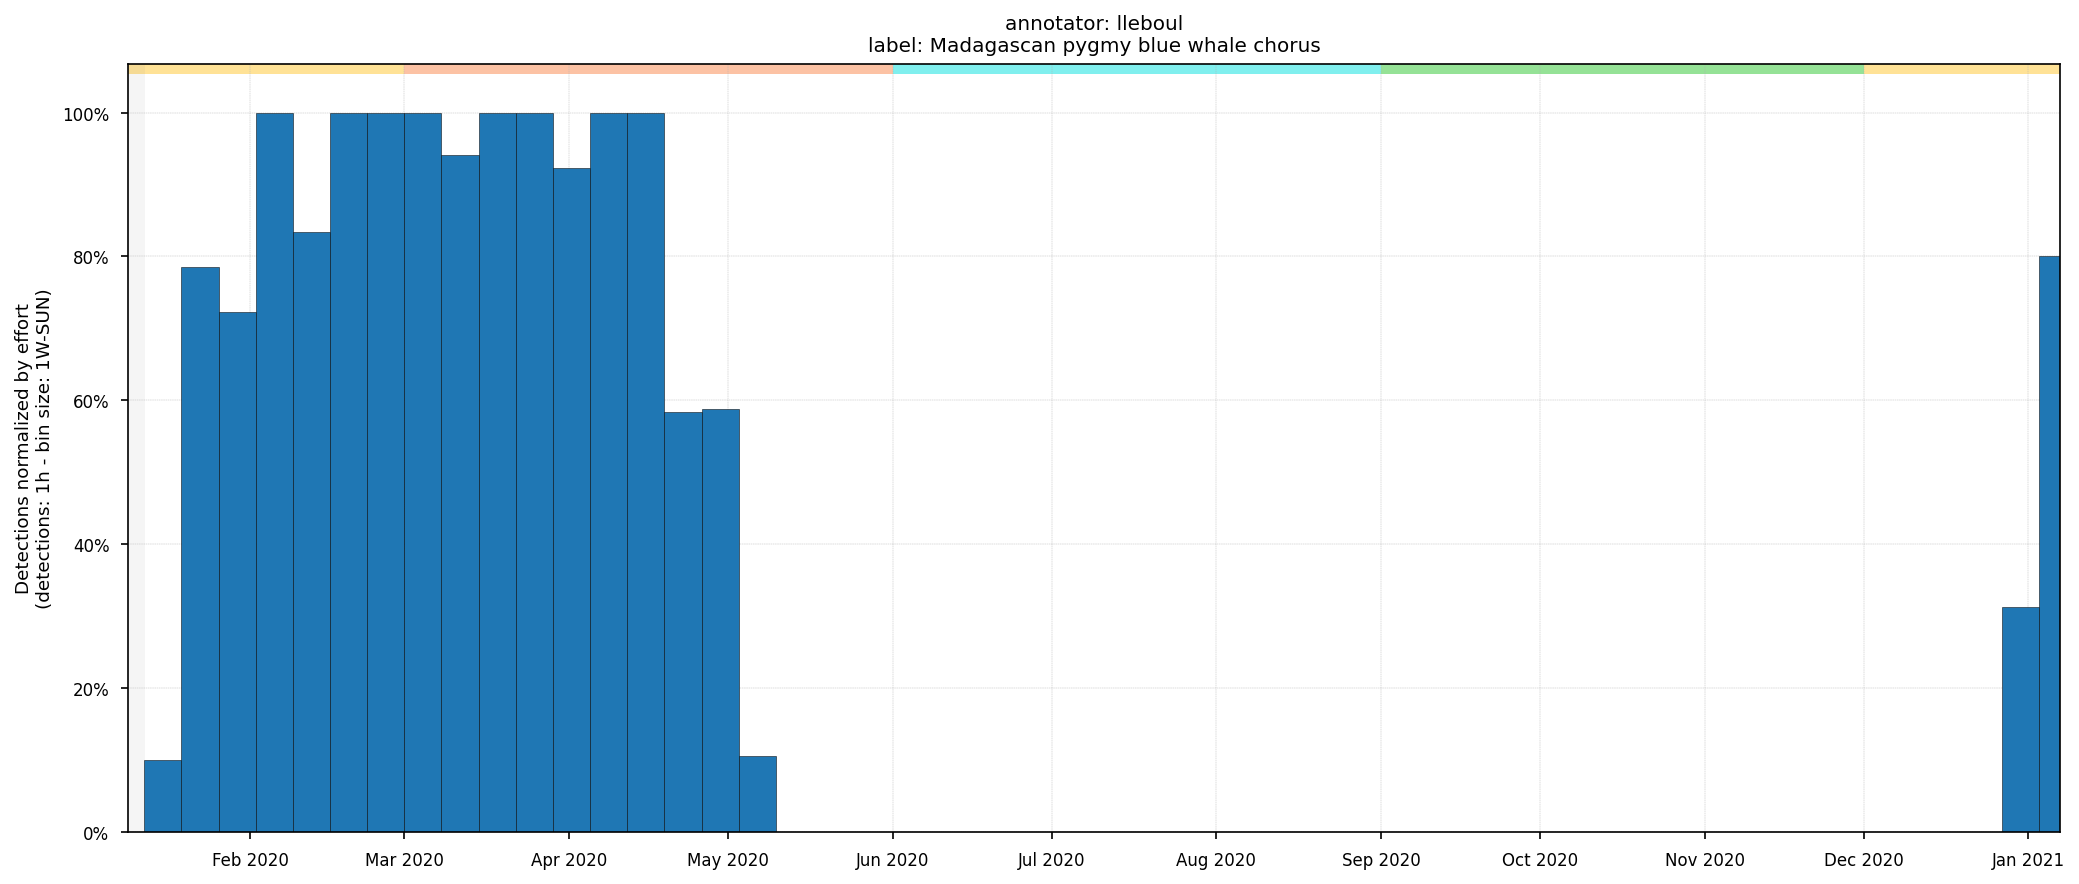

In [5]:
data = data_list[0]
config = config_list[0]

fig, ax = plt.subplots(1, 1)

bin_size = frequencies.to_offset("1W-SUN")
ticks = frequencies.to_offset("1MS")
fmt = "%b %Y"

recording_data = RecordingPeriod.from_path(config=config,
                                           date_format="%Y_%m_%d_%H_%M_%S_%f%z",
                                           bin_size=bin_size,
                                           )
ax = data.set_ax(ax=ax, x_ticks_res=ticks, date_format=fmt)
data.plot(
    mode="histogram",
    annotator="lleboul",
    label='Madagascan pygmy blue whale chorus',
    ax=ax,
    bin_size=bin_size,
    effort=recording_data,
    season=True,
)
plt.tight_layout()
plt.show()


### Multi-barplot

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 10))

bin_size = frequencies.to_offset("1W-SUN")
ticks = frequencies.to_offset("1MS")
fmt = "%b %y"
for i in range(len(axs)):
    data = data_list[i]
    axs[i] = data_list[0].set_ax(ax=axs[i], x_ticks_res=ticks, date_format=fmt)
    data.plot(
        mode="histogram",
        annotator="lleboul",
        label='Madagascan pygmy blue whale chorus',
        ax=axs[i],
        bin_size=bin_size,
        season=True,
    )

plt.tight_layout()
plt.show()
